# Lab assignment №1, part 2

This lab assignment consists of several parts. You are supposed to make some transformations, train some models, estimate the quality of the models and explain your results.

Several comments:
* Don't hesitate to ask questions, it's a good practice.
* No private/public sharing, please. The copied assignments will be graded with 0 points.
* Blocks of this lab will be graded separately.

__*This is the second part of the assignment. First and third parts are waiting for you in the same directory.*__

## Part 2. Data preprocessing, model training and evaluation.

### 1. Reading the data
Today we work with the [dataset](https://archive.ics.uci.edu/ml/datasets/Statlog+%28Vehicle+Silhouettes%29), describing different cars for multiclass ($k=4$) classification problem. The data is available below.

In [24]:
# If on colab, uncomment the following lines

# ! wget https://raw.githubusercontent.com/girafe-ai/ml-mipt/basic_f20/homeworks_basic/Lab1_ML_pipeline_and_SVM/car_data.csv

In [25]:
import pandas as pd
import numpy as np
import plot as plot
from sklearn.model_selection import train_test_split

dataset = pd.read_csv('car_data.csv', delimiter=',', header=None).values
data = dataset[:, :-1].astype(int)
target = dataset[:, -1]

print(data.shape, target.shape)

X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.35)
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(846, 19) (846,)
(549, 19) (549,) (297, 19) (297,)


To get some insights about the dataset, `pandas` might be used. The `train` part is transformed to `pd.DataFrame` below.

In [26]:
X_train_pd = pd.DataFrame(X_train)

# First 15 rows of our dataset.
X_train_pd.head(15)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
0,747,80,43,68,123,53,7,150,46,19,147,169,327,176,81,7,14,179,184
1,302,94,37,72,193,72,6,158,41,19,133,184,385,127,70,0,14,200,204
2,440,101,51,98,194,60,10,195,34,22,161,219,572,219,67,0,10,192,201
3,632,86,44,70,140,64,6,148,45,19,145,170,322,185,82,10,1,181,183
4,517,107,54,108,228,68,12,218,31,25,170,223,700,224,67,13,25,190,204
5,768,91,46,101,199,65,9,196,34,23,146,219,574,199,73,5,8,186,194
6,94,84,45,66,154,65,6,145,46,19,144,168,312,177,73,2,3,184,188
7,555,87,49,86,190,64,9,177,37,21,153,197,471,209,67,11,7,192,199
8,149,93,36,64,165,69,8,136,49,18,136,161,279,127,67,2,29,193,204
9,11,90,34,66,136,55,6,123,54,17,118,148,224,118,65,5,26,196,202


Methods `describe` and `info` deliver some useful information.

In [27]:
X_train_pd.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
count,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000
mean,426.779599,93.588342,44.657559,81.581056,167.041894,61.271403,8.426230,168.225865,41.134791,20.539162,147.604736,187.803279,436.637523,173.548270,72.695811,6.413479,12.588342,188.608379,195.224044
std,244.813680,8.291338,6.238511,15.837429,33.452549,7.397297,4.132006,33.369803,7.869374,2.604883,14.707937,31.394905,177.550707,32.756901,7.180951,4.995827,9.084856,6.102650,7.488853
min,1.000000,73.000000,33.000000,40.000000,105.000000,47.000000,2.000000,112.000000,26.000000,17.000000,118.000000,130.000000,184.000000,109.000000,59.000000,0.000000,0.000000,176.000000,181.000000
25%,212.000000,87.000000,40.000000,70.000000,139.000000,57.000000,7.000000,146.000000,34.000000,19.000000,136.000000,167.000000,318.000000,148.000000,67.000000,2.000000,5.000000,184.000000,190.000000
50%,429.000000,92.000000,44.000000,78.000000,164.000000,61.000000,8.000000,156.000000,43.000000,20.000000,145.000000,177.000000,361.000000,173.000000,72.000000,6.000000,11.000000,188.000000,196.000000
75%,649.000000,100.000000,49.000000,98.000000,194.000000,64.000000,10.000000,195.000000,46.000000,22.000000,159.000000,216.000000,574.000000,195.000000,76.000000,10.000000,19.000000,193.000000,201.000000
max,845.000000,119.000000,59.000000,112.000000,322.000000,133.000000,52.000000,265.000000,61.000000,29.000000,188.000000,288.000000,1018.000000,268.000000,127.000000,22.000000,41.000000,204.000000,211.000000


In [28]:
X_train_pd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 549 entries, 0 to 548
Data columns (total 19 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   0       549 non-null    int32
 1   1       549 non-null    int32
 2   2       549 non-null    int32
 3   3       549 non-null    int32
 4   4       549 non-null    int32
 5   5       549 non-null    int32
 6   6       549 non-null    int32
 7   7       549 non-null    int32
 8   8       549 non-null    int32
 9   9       549 non-null    int32
 10  10      549 non-null    int32
 11  11      549 non-null    int32
 12  12      549 non-null    int32
 13  13      549 non-null    int32
 14  14      549 non-null    int32
 15  15      549 non-null    int32
 16  16      549 non-null    int32
 17  17      549 non-null    int32
 18  18      549 non-null    int32
dtypes: int32(19)
memory usage: 40.9 KB


### 2. Machine Learning pipeline
Here you are supposed to perform the desired transformations. Please, explain your results briefly after each task.

#### 2.0. Data preprocessing
* Make some transformations of the dataset (if necessary). Briefly explain the transformations

In [29]:
from sklearn import preprocessing
normalizer = preprocessing.MinMaxScaler()
X_train_norm = normalizer.fit_transform(X_train) # надо данные отнормировать
X_test_norm = normalizer.fit_transform(X_test) # надо данные отнормировать
X_train_pd = pd.DataFrame(data=X_train_norm)
### YOUR CODE HERE

#### 2.1. Basic logistic regression
* Find optimal hyperparameters for logistic regression with cross-validation on the `train` data (small grid/random search is enough, no need to find the *best* parameters).

* Estimate the model quality with `f1` and `accuracy` scores.
* Plot a ROC-curve for the trained model. For the multiclass case you might use `scikitplot` library (e.g. `scikitplot.metrics.plot_roc(test_labels, predicted_proba)`).

*Note: please, use the following hyperparameters for logistic regression: `multi_class='multinomial'`, `solver='saga'` `tol=1e-3` and ` max_iter=500`.*

0.67003367003367
0.6738951914987062


c:\users\pavel\pycharmprojects\ml-mipt\venv\lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning: Function plot_roc_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_roc instead.
  warnings.warn(msg, category=FutureWarning)


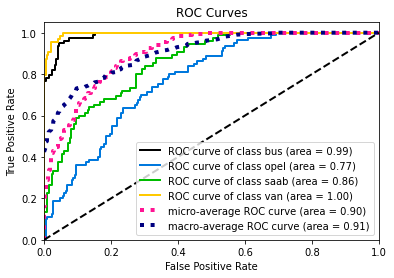

In [30]:
#подыскал нужные функции в sklearn
from sklearn.linear_model import LogisticRegressionCV
regressor = LogisticRegressionCV(cv=20,multi_class='multinomial',solver='saga',tol=1e-3,max_iter=500)
regressor.fit(X_train_norm,y_train)
y_predict = regressor.predict(X_test_norm)
y_predict_proba = regressor.predict_proba(X_test_norm)

from sklearn.metrics import accuracy_score,f1_score
accuracy = accuracy_score(y_test,y_predict)
print(accuracy)
f1_score = f1_score(y_test,y_predict,average="weighted")
print(f1_score)
from scikitplot.metrics import plot_roc_curve
roc_ = plot_roc_curve(y_test,y_predict_proba)
### YOUR CODE HERE

In [31]:
# You might use this command to install scikit-plot. 
# Warning, if you a running locally, don't call pip from within jupyter, call it from terminal in the corresponding 
# virtual environment instead

# ! pip install scikit-plot

#### 2.2. PCA: explained variance plot
* Apply the PCA to the train part of the data. Build the explaided variance plot. 

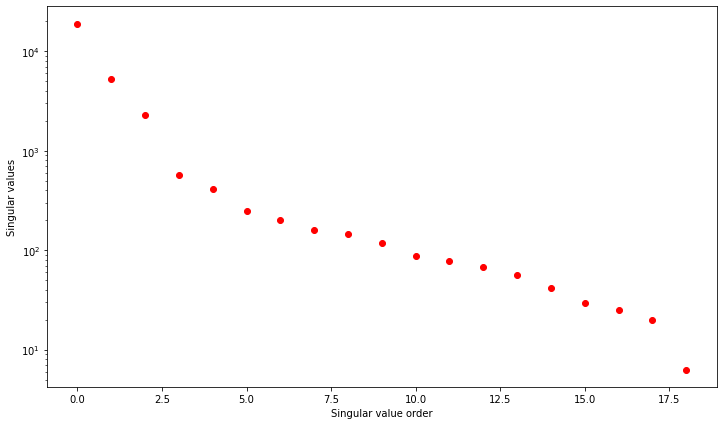

In [32]:
from matplotlib import pyplot as plt
#взял из семинара про PCA
u, Xs, vh = np.linalg.svd(X_train, full_matrices=False)

plt.figure(figsize=(12,7))
plt.plot(Xs,'ro')
plt.yscale('log')
plt.ylabel("Singular values")
plt.xlabel("Singular value order")
plt.show()
### YOUR CODE HERE

#### 2.3. PCA trasformation
* Select the appropriate number of components. Briefly explain your choice. Should you normalize the data?

*Use `fit` and `transform` methods to transform the `train` and `test` parts.*

In [33]:
#выбираем 17 компонент, тк в этот момент происходит скачок и оставшийся хвост можно не учитывать
#нормализовать данные не надо
from sklearn.decomposition import PCA
pca = PCA(n_components=17)
X_train_pca_ = pca.fit_transform(X_train)
X_test_pca_ = pca.fit_transform(X_test)
### YOUR CODE HERE

**Note: From this point `sklearn` [Pipeline](https://scikit-learn.org/stable/modules/compose.html) might be useful to perform transformations on the data. Refer to the [docs](https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html) for more information.**

#### 2.4. Logistic regression on PCA-preprocessed data.
* Find optimal hyperparameters for logistic regression with cross-validation on the transformed by PCA `train` data.

* Estimate the model quality with `f1` and `accuracy` scores.
* Plot a ROC-curve for the trained model. For the multiclass case you might use `scikitplot` library (e.g. `scikitplot.metrics.plot_roc(test_labels, predicted_proba)`).

*Note: please, use the following hyperparameters for logistic regression: `multi_class='multinomial'`, `solver='saga'` and `tol=1e-3`*

0.5589225589225589
0.5533010684180781


c:\users\pavel\pycharmprojects\ml-mipt\venv\lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning: Function plot_roc_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_roc instead.
  warnings.warn(msg, category=FutureWarning)


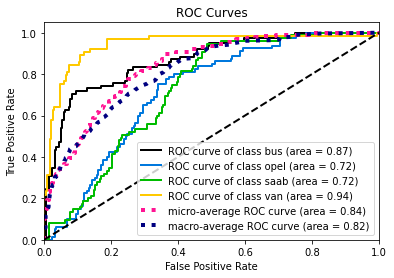

In [34]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegressionCV
from sklearn.metrics import accuracy_score,f1_score
pipe = make_pipeline(
    MinMaxScaler(),
    LogisticRegressionCV(cv=20,multi_class='multinomial',solver='saga',tol=1e-3,max_iter=500),

)
pipe.fit(X_train_pca_,y_train)
y_predict = pipe.predict(X_test_pca_)
y_predict_proba = pipe.predict_proba(X_test_pca_)

from sklearn.metrics import accuracy_score,f1_score
accuracy = accuracy_score(y_test,y_predict)
print(accuracy)
f1_score = f1_score(y_test,y_predict,average="weighted")
print(f1_score)
from scikitplot.metrics import plot_roc_curve
roc_ = plot_roc_curve(y_test,y_predict_proba)
### YOUR CODE HERE

#### 2.5. Decision tree
* Now train a desicion tree on the same data. Find optimal tree depth (`max_depth`) using cross-validation.

* Measure the model quality using the same metrics you used above.

0.5117845117845118
0.509172900833922


c:\users\pavel\pycharmprojects\ml-mipt\venv\lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning: Function plot_roc_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_roc instead.
  warnings.warn(msg, category=FutureWarning)


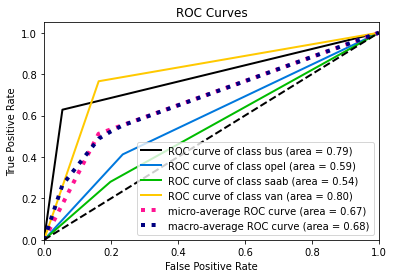

In [35]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

parameters = {'max_depth':range(2,50)}

cv = GridSearchCV(DecisionTreeClassifier(), parameters,cv=10)
cv.fit(X_train_pca_, y=y_train)
tree_model = cv.best_estimator_
best_max_depth = cv.best_params_['max_depth']
y_predict = tree_model.predict(X_test_pca_)
y_predict_proba = tree_model.predict_proba(X_test_pca_)

from sklearn.metrics import accuracy_score,f1_score
accuracy = accuracy_score(y_test,y_predict)
print(accuracy)
f1_score = f1_score(y_test,y_predict,average="weighted")
print(f1_score)
from scikitplot.metrics import plot_roc_curve
roc_ = plot_roc_curve(y_test,y_predict_proba)

# YOUR CODE HERE

#### 2.6. Bagging.
Here starts the ensembling part.

First we will use the __Bagging__ approach. Build an ensemble of $N$ algorithms varying N from $N_{min}=2$ to $N_{max}=100$ (with step 5).

We will build two ensembles: of logistic regressions and of decision trees.

*Comment: each ensemble should be constructed from models of the same family, so logistic regressions should not be mixed up with decision trees.*


*Hint 1: To build a __Bagging__ ensebmle varying the ensemble size efficiently you might generate $N_{max}$ subsets of `train` data (of the same size as the original dataset) using bootstrap procedure once. Then you train a new instance of logistic regression/decision tree with optimal hyperparameters you estimated before on each subset (so you train it from scratch). Finally, to get an ensemble of $N$ models you average the $N$ out of $N_{max}$ models predictions.*

*Hint 2: sklearn might help you with this taks. Some appropriate function/class might be out there.*

* Plot `f1` and `accuracy` scores plots w.r.t. the size of the ensemble.

* Briefly analyse the plot. What is the optimal number of algorithms? Explain your answer.

* How do you think, are the hyperparameters for the decision trees you found in 2.5 optimal for trees used in ensemble? 

In [36]:
from sklearn.ensemble import BaggingRegressor
from sklearn.linear_model import LogisticRegression
regressor = BaggingRegressor(LogisticRegression(multi_class='multinomial',solver='saga',tol=1e-3,max_iter=500),n_estimators=5)
regressor.fit(X_train_pca_,y_train)

# y_predict = regressor.predict(X_test_pca_)
# y_predict_proba = regressor.predict_proba(X_test_pca_)
#
# from sklearn.metrics import accuracy_score,f1_score
# accuracy = accuracy_score(y_test,y_predict)
# print(accuracy)
# f1_score = f1_score(y_test,y_predict,average="weighted")
# print(f1_score)
# from scikitplot.metrics import plot_roc_curve
# roc_ = plot_roc_curve(y_test,y_predict_proba)

# YOUR CODE HERE

c:\users\pavel\pycharmprojects\ml-mipt\venv\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
c:\users\pavel\pycharmprojects\ml-mipt\venv\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
c:\users\pavel\pycharmprojects\ml-mipt\venv\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
c:\users\pavel\pycharmprojects\ml-mipt\venv\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
c:\users\pavel\pycharmprojects\ml-mipt\venv\lib\site-packages\sklearn\li

BaggingRegressor(base_estimator=LogisticRegression(max_iter=500,
                                                   multi_class='multinomial',
                                                   solver='saga', tol=0.001),
                 n_estimators=5)

In [37]:
from sklearn.ensemble import BaggingRegressor
from sklearn.tree import DecisionTreeClassifier
regressor = BaggingRegressor(DecisionTreeClassifier(max_depth=25),n_estimators=5)
regressor.fit(X_train_pca_,y_train)

# y_predict = regressor.predict(X_test_pca_)
# y_predict_proba = regressor.predict_proba(X_test_pca_)
#
# from sklearn.metrics import accuracy_score,f1_score
# accuracy = accuracy_score(y_test,y_predict)
# print(accuracy)
# f1_score = f1_score(y_test,y_predict,average="weighted")
# print(f1_score)
# from scikitplot.metrics import plot_roc_curve
# roc_ = plot_roc_curve(y_test,y_predict_proba)


BaggingRegressor(base_estimator=DecisionTreeClassifier(max_depth=25),
                 n_estimators=5)

#### 2.7. Random Forest
Now we will work with the Random Forest (its `sklearn` implementation).

* * Plot `f1` and `accuracy` scores plots w.r.t. the number of trees in Random Forest.

* What is the optimal number of trees you've got? Is it different from the optimal number of logistic regressions/decision trees in 2.6? Explain the results briefly.

0.5993265993265994
0.596875255659973


c:\users\pavel\pycharmprojects\ml-mipt\venv\lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning: Function plot_roc_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_roc instead.
  warnings.warn(msg, category=FutureWarning)


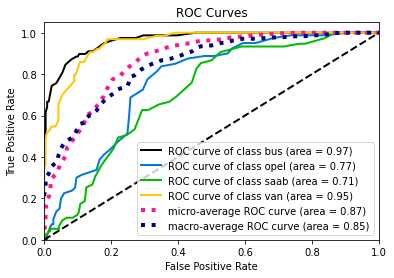

In [38]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

parameters = {'n_estimators':range(50,100)}

cv = GridSearchCV(RandomForestClassifier(), parameters)
cv.fit(X_train_pca_, y=y_train)
forest_model = cv.best_estimator_
best_n_estimators = cv.best_params_['n_estimators']

y_predict = forest_model.predict(X_test_pca_)
y_predict_proba = forest_model.predict_proba(X_test_pca_)

from sklearn.metrics import accuracy_score,f1_score
accuracy = accuracy_score(y_test,y_predict)
print(accuracy)
f1_score = f1_score(y_test,y_predict,average="weighted")
print(f1_score)
from scikitplot.metrics import plot_roc_curve
roc_ = plot_roc_curve(y_test,y_predict_proba)
# YOUR CODE HERE

#### 2.8. Learning curve
Your goal is to estimate, how does the model behaviour change with the increase of the `train` dataset size.

* Split the training data into 10 equal (almost) parts. Then train the models from above (Logistic regression, Desicion Tree, Random Forest) with optimal hyperparameters you have selected on 1 part, 2 parts (combined, so the train size in increased by 2 times), 3 parts and so on.

* Build a plot of `accuracy` and `f1` scores on `test` part, varying the `train` dataset size (so the axes will be score - dataset size.

* Analyse the final plot. Can you make any conlusions using it? 

c:\users\pavel\pycharmprojects\ml-mipt\venv\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
c:\users\pavel\pycharmprojects\ml-mipt\venv\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
c:\users\pavel\pycharmprojects\ml-mipt\venv\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
c:\users\pavel\pycharmprojects\ml-mipt\venv\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
c:\users\pavel\pycharmprojects\ml-mipt\venv\lib\site-packages\sklearn\li

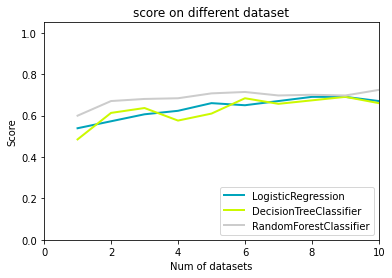

In [39]:
X_train_subsets = np.array_split(X_train,10)
y_train_subsets = np.array_split(y_train,10)
i = 1
result = np.zeros([10,4])
for i in range(10):
    subsets_count = i+1
    Xtrain = np.vstack(X_train_subsets[:subsets_count])
    ytrain = np.hstack(y_train_subsets[:subsets_count])
    lr = LogisticRegression(multi_class='multinomial',solver='saga',tol=1e-3,max_iter=500)
    lr.fit(Xtrain,ytrain)
    lr_score = lr.score(X_test,y_test)
    dt = DecisionTreeClassifier(max_depth=best_max_depth)
    dt.fit(Xtrain,ytrain)
    dt_score = dt.score(X_test,y_test)
    rf = RandomForestClassifier(n_estimators=best_n_estimators)
    rf.fit(Xtrain,ytrain)
    rf_score = rf.score(X_test,y_test)

    result[i][0] = subsets_count
    result[i][1] = lr_score
    result[i][2] = dt_score
    result[i][3] = rf_score

resT = result.T
fig, ax = plt.subplots(1, 1)
ax.set_title("score on different dataset")

cmap = plt.cm.get_cmap("nipy_spectral")
color = cmap(1/3)
ax.plot(resT[0], resT[1], lw=2, color=color,
                    label='LogisticRegression')

color = cmap(2/3)
ax.plot(resT[0], resT[2], lw=2, color=color,
                    label='DecisionTreeClassifier')

color = cmap(3/3)
ax.plot(resT[0], resT[3], lw=2, color=color,
                    label='RandomForestClassifier')

ax.set_xlim([0.0, 10.0])
ax.set_ylim([0.0, 1.05])
ax.set_xlabel('Num of datasets')
ax.set_ylabel('Score')
ax.legend(loc='lower right')
##
# Из графика можно сделать вывод, что RandomForest практически не изменяется с кол-вом датасетов,
# LogisticRegression плох на маленьких датасетах, но сравнивается с DecisionTreeClassifier на полном сете
# DecisionTreeClassifier с увеличением колва датасетов показывает лучше результат#
# YOUR CODE HERE